# This Notebook includes 
 - testing several regression models in order to determine which one will be used later on
 - in the process will be spliting the data into training and testing sets and looping through each model and train it and display the MSE in a graph
 - the one with the lowest MSE will be chosen as the model to train

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [21]:
## importing file_utils 
import sys

# setting path
sys.path.append('../')

from utils.file_utils.file_utils import getProcessedDataSetFilePath

REPO_PATH = "C:\\Users\\mohamedanas.neji\\OneDrive - Medius\\Desktop\\Housing_pricing"
FILENAME = "merged.csv"
FILE_PATH = getProcessedDataSetFilePath(FILENAME, REPO_PATH)

In [22]:
# 1 - import the data and seperate the x and y
data = pd.read_csv(FILE_PATH)

data.head()

,surface,city,rooms,bathrooms,parking,pool,vue_panoramique,jardin,climatisation,chauffage_central,ascenseur,price
0,141.0,20,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,490000.0
1,100.0,20,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,380000.0
2,130.0,71,3.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,180000.0
3,120.0,8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240000.0
4,148.0,30,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,365000.0


In [23]:
# 2 - split the data into X and Y
X = data.drop(columns=['price'])
Y = data['price']

In [24]:
# Keep a copy of the original (unstandardized) data for tree-based models
X_unscaled = X.copy()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# 3 - split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_unscaled, X_test_unscaled, Y_train_unscaled, Y_test_unscaled = train_test_split(X_unscaled, Y, test_size=0.2, random_state=42)

In [26]:
# 4 - Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_linear = lin_reg.predict(X_test)

In [27]:
# 5 -Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)
Y_pred_poly = poly_reg.predict(X_test_poly)

In [28]:
# 6 - Ridge and Lasso Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, Y_train)
Y_pred_ridge = ridge_reg.predict(X_test)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
Y_pred_lasso = lasso_reg.predict(X_test)

In [29]:
# 7 - Decision Tree Regression (using unscaled data)
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_unscaled, Y_train_unscaled)
Y_pred_tree = decision_tree.predict(X_test_unscaled)

In [30]:
# 8 - Random Forest Regression (using unscaled data)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_unscaled, Y_train_unscaled.ravel())
Y_pred_forest = random_forest.predict(X_test_unscaled)

C:\Users\mohamedanas.neji\AppData\Local\Temp\ipykernel_21304\1167852276.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  random_forest.fit(X_train_unscaled, Y_train_unscaled.ravel())


In [31]:
# 9 - XGBoost Regression
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, Y_train.ravel())
Y_pred_xgb = xgb_reg.predict(X_test)

C:\Users\mohamedanas.neji\AppData\Local\Temp\ipykernel_21304\1116651106.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_reg.fit(X_train, Y_train.ravel())


In [32]:
# 10 - LightGBM Regression
lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train, Y_train.ravel())
Y_pred_lgb = lgb_reg.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4572, number of used features: 11
[LightGBM] [Info] Start training from score 368488.702756


C:\Users\mohamedanas.neji\AppData\Local\Temp\ipykernel_21304\776998489.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lgb_reg.fit(X_train, Y_train.ravel())
c:\Users\mohamedanas.neji\AppData\Local\anaconda3\envs\Housing_pricing\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mohamedanas.neji\AppData\Local\anaconda3\envs\Housing_pricing\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [36]:
# 11 - Evaluate models
mse_values = {
    "Linear Regression": root_mean_squared_error(Y_test, Y_pred_linear),
    "Polynomial Regression": root_mean_squared_error(Y_test, Y_pred_poly),
    "Ridge Regression": root_mean_squared_error(Y_test, Y_pred_ridge),
    "Lasso Regression": root_mean_squared_error(Y_test, Y_pred_lasso),
    "Decision Tree": root_mean_squared_error(Y_test_unscaled, Y_pred_tree),
    "Random Forest": root_mean_squared_error(Y_test_unscaled, Y_pred_forest),
    "XGBoost": root_mean_squared_error(Y_test, Y_pred_xgb),
    "LightGBM": root_mean_squared_error(Y_test, Y_pred_lgb)
}

for model, mse in mse_values.items():
    print(f"{model} RMSE: {mse}")

Linear Regression RMSE: 170007.03484884766
Polynomial Regression RMSE: 178729.04115510348
Ridge Regression RMSE: 170009.54918721048
Lasso Regression RMSE: 170007.0359603065
Decision Tree RMSE: 615446.9308002803
Random Forest RMSE: 203001.9170915583
XGBoost RMSE: 191258.62228036916
LightGBM RMSE: 158077.37358754227


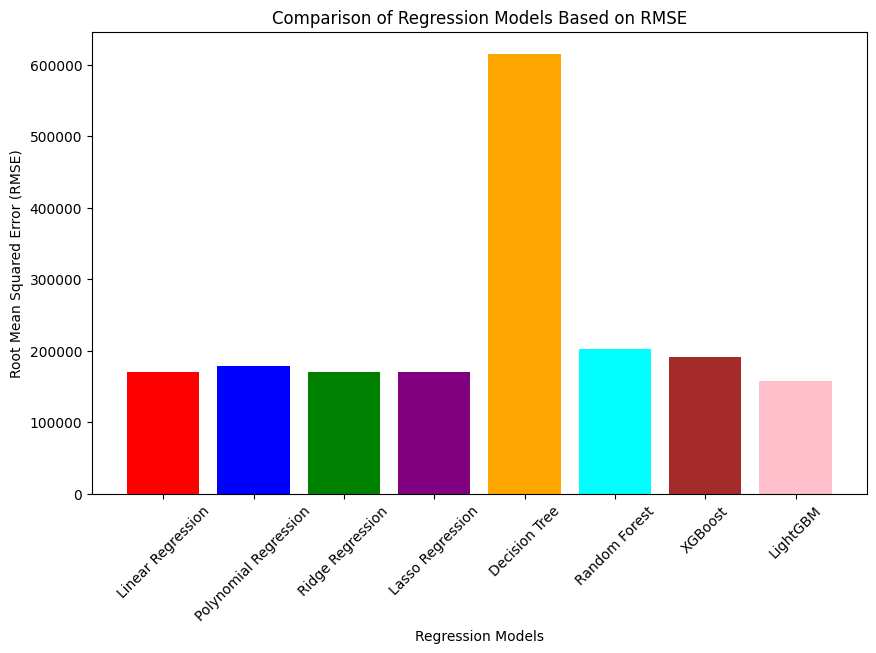

In [37]:
# 12 - Plot results
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown', 'pink'])
plt.xlabel("Regression Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of Regression Models Based on RMSE")
plt.xticks(rotation=45)
plt.show()

In [38]:
# 13 - Print the best model
best_model = min(mse_values, key=mse_values.get)
print(f"The best model is: {best_model} with a RMSE of {mse_values[best_model]}")

The best model is: LightGBM with a RMSE of 158077.37358754227
